### Installation and Setup

In [26]:
! pip install pillow



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Creating New Images

In [27]:
from PIL import Image
img = Image.new("RGB", (200, 200), color="blue")
img.show()

### Opening and Displaying an Image

In [28]:
from PIL import Image
image_path = '1.jpg'
img = Image.open(image_path)
img.show()


### Showing Gif Frames

In [29]:
from PIL import Image, ImageSequence
gif = Image.open("random.gif")
for frame in ImageSequence.Iterator(gif):
    # frame.show()
    pass


### Saving an Image

In [30]:
from PIL import Image

img = Image.open(image_path)
img = img.convert("L")

# Save the image with optional parameters
img.save("output.jpg", format="JPEG", quality=85, optimize=True)

img.save("output.png", format="PNG", optimize=True)


### Saving an Animated GIF

In [31]:
from PIL import Image, ImageSequence

gif = Image.open("random.gif")

frames = [frame.copy() for frame in ImageSequence.Iterator(gif)]
frames = [frame.convert("L") for frame in frames]
frames[0].save("output_animated.gif", save_all=True, append_images=frames[1:], duration=200, loop=0)


### Image Size and Dimensions

In [32]:
width, height = img.size
w = img.width
h = img.height

print("width: ", w)
print("height: ", h)


width:  721
height:  1280


### Accessing Pixel Data

In [33]:
from PIL import Image

img = Image.open(image_path).convert("RGB")

pixel = img.getpixel((10, 10))

img.putpixel((10, 10), (73, 89, 90))

img.show(img)


### Cropping

In [34]:
from PIL import Image


img = Image.open(image_path)

# Crop the image to a specific box (left, upper, right, lower)
img_cropped = img.crop((50, 50, 1000, 200))
img_cropped.show()


### Rotation

In [35]:
from PIL import Image

img = Image.open(image_path)

# Rotate the image by 45 degrees
img_rotated = img.rotate(45)
img_rotated.show()


###  Flipping

In [36]:
from PIL import Image

img = Image.open(image_path)

# Flip the image horizontally
img_transposed = img.transpose(Image.FLIP_LEFT_RIGHT)
img_transposed.save("flipped_image_horizontally.jpg")

# Flip the image vertically
img_transposed_vertical = img.transpose(Image.FLIP_TOP_BOTTOM)
img_transposed_vertical.show()


### Changing Image Color Mode

In [37]:
from PIL import Image

img = Image.open(image_path)
print(f"Original color mode: {img.mode}")

img_gray = img.convert("L")
img_gray.show()

img_rgba = img.convert("RGBA")
img_rgba.show()


Original color mode: RGB


### Applying Different Filters

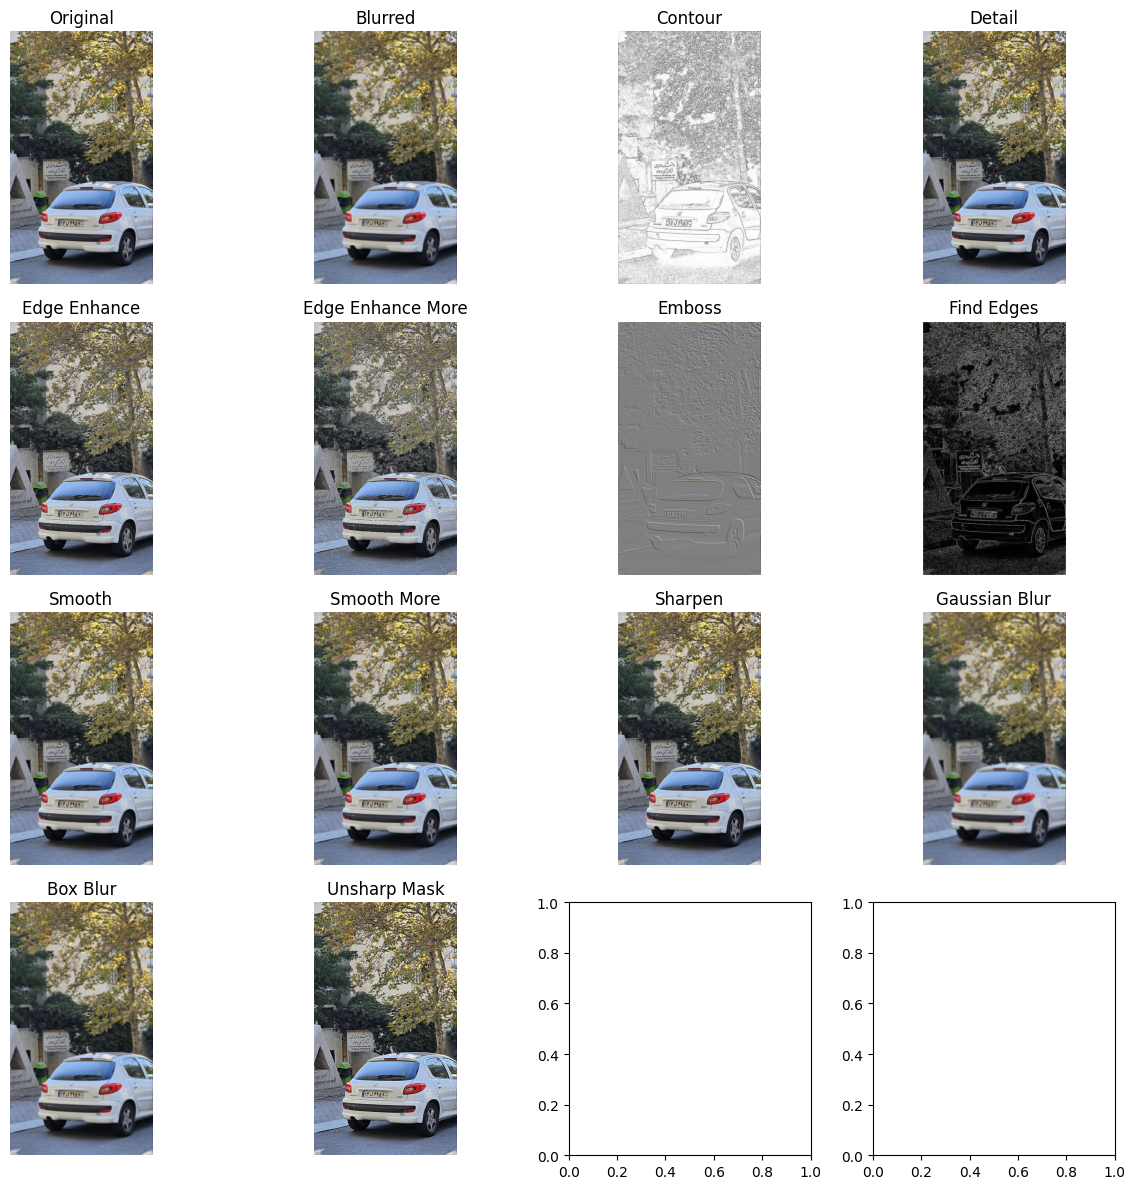

In [38]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

img = Image.open(image_path)

blurred = img.filter(ImageFilter.BLUR)
contour = img.filter(ImageFilter.CONTOUR)
detail = img.filter(ImageFilter.DETAIL)
edge_enhance = img.filter(ImageFilter.EDGE_ENHANCE)
edge_enhance_more = img.filter(ImageFilter.EDGE_ENHANCE_MORE)
emboss = img.filter(ImageFilter.EMBOSS)
find_edges = img.filter(ImageFilter.FIND_EDGES)
smooth = img.filter(ImageFilter.SMOOTH)
smooth_more = img.filter(ImageFilter.SMOOTH_MORE)
sharpen = img.filter(ImageFilter.SHARPEN)

gaussian_blur = img.filter(ImageFilter.GaussianBlur(radius=3))
box_blur = img.filter(ImageFilter.BoxBlur(radius=2))
unsharp_mask = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))


fig, axs = plt.subplots(4, 4, figsize=(12, 12))

images = [
    ("Original", img),
    ("Blurred", blurred),
    ("Contour", contour),
    ("Detail", detail),
    ("Edge Enhance", edge_enhance),
    ("Edge Enhance More", edge_enhance_more),
    ("Emboss", emboss),
    ("Find Edges", find_edges),
    ("Smooth", smooth),
    ("Smooth More", smooth_more),
    ("Sharpen", sharpen),
    ("Gaussian Blur", gaussian_blur),
    ("Box Blur", box_blur),
    ("Unsharp Mask", unsharp_mask)
]

for i, (title, image) in enumerate(images):
    ax = axs[i // 4, i % 4]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Custom Filter

In [39]:
from PIL import Image, ImageFilter


img = Image.open(image_path)

kernel = [-1, -1, -1, -1,  9, -1, -1, -1, -1]
size = (3, 3)

custom_filter = ImageFilter.Kernel(size, kernel, scale=None, offset=0)
filtered_image = img.filter(custom_filter)

filtered_image.show()


### Histogram of an Image

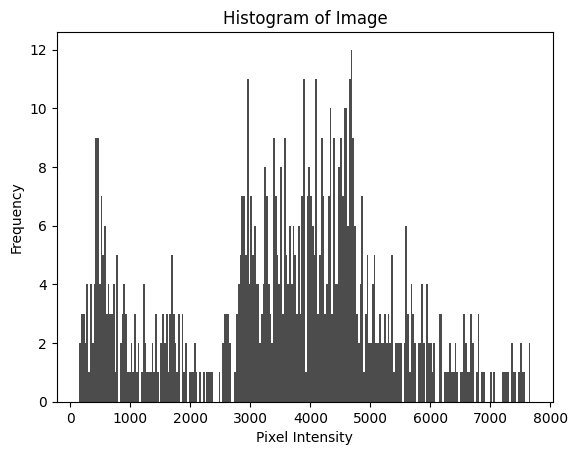

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)

hist = img.histogram()

plt.hist(hist, bins=256, color='black', alpha=0.7)
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


### Getting the Red Channel

In [41]:
from PIL import Image

img = Image.open(image_path)

r_channel = img.getchannel('B')
r_channel.show()


### Getting the Bounding Box of Non-Zero Areas

In [42]:
from PIL import Image

img = Image.open(image_path)
img_gray = img.convert("L")

threshold = 128
img_binary = img_gray.point(lambda p: p > threshold and 255)

bbox = img_binary.getbbox()

print("Bounding Box:", bbox)

if bbox:
    cropped_img = img_binary.crop(bbox)
    cropped_img.show()


Bounding Box: (0, 0, 721, 1280)


### Image Addition and Multiplication

In [43]:

from PIL import Image, ImageChops

img1 = Image.open("a.png")
img2 = Image.open("b.png")


img_added = ImageChops.add(img1, img2)
img_added.show()

img_multiplied = ImageChops.multiply(img1, img2)
img_multiplied.show()


### Image Blending

In [44]:
from PIL import Image

img1 = Image.open("a.png")
img2 = Image.open("b.png")

img2 = img2.resize(img1.size)

#The Image.blend method requires both images to have the same size and mode
img1 = img1.convert("L")
img2 = img2.convert("L")

# Blend the images
blended = Image.blend(img1, img2, alpha=0.5)

blended.show()



### Image Composite with Mask

In [45]:
from PIL import Image

img1 = Image.open("1.jpg")
img2 = Image.open("b.png")
mask = Image.open("a.png").convert("L")

# Resize images to match the mask size
img1 = img1.resize(mask.size)
img2 = img2.resize(mask.size)

img1 = img1.convert("L")
img2 = img2.convert("L")

composite = Image.composite(img1, img2, mask)
composite.show()


### Creating a Mask

### Image Blur

### Image Enhancement (Contrast)

In [46]:
from PIL import Image, ImageEnhance

img = Image.open(image_path)

# Enhance the contrast of the image by a factor of 2
enhancer = ImageEnhance.Contrast(img)
img_contrast = enhancer.enhance(2.0)
img_contrast.show()


### Saving with Compression

The enhanced image from previous part is saved.

In [47]:

img_contrast.save("output.jpg", quality=95, optimize=True, progressive=True)


### Combine Things Together

Here, a new mask is created and then two images are composed and some enhancement is done.

In [48]:
from PIL import Image, ImageEnhance

img1 = Image.open(image_path)
img2 = Image.open("b.png")

# Create a new mask (50% gray)
mask = Image.new("L", (200, 200), color=128)

# Resize images to match the mask size (200x200)
img1 = img1.resize(mask.size)
img2 = img2.resize(mask.size)

# Convert both images to grayscale ('L' mode)
img1 = img1.convert("L")
img2 = img2.convert("L")

# Enhance the contrast of the images
contrast_enhancer = ImageEnhance.Contrast(img1)
img1_contrast = contrast_enhancer.enhance(2.0)  # Increase contrast by 2x

contrast_enhancer = ImageEnhance.Contrast(img2)
img2_contrast = contrast_enhancer.enhance(2.0)  # Increase contrast by 2x

# Enhance the brightness of the images
brightness_enhancer = ImageEnhance.Brightness(img1)
img1_brightness = brightness_enhancer.enhance(1.5)  # Increase brightness by 1.5x

brightness_enhancer = ImageEnhance.Brightness(img2)
img2_brightness = brightness_enhancer.enhance(1.5)  # Increase brightness by 1.5x

# Enhance the sharpness of the images
sharpness_enhancer = ImageEnhance.Sharpness(img1)
img1_sharpness = sharpness_enhancer.enhance(2.0)  # Increase sharpness by 2x

sharpness_enhancer = ImageEnhance.Sharpness(img2)
img2_sharpness = sharpness_enhancer.enhance(2.0)  # Increase sharpness by 2x

# Enhance the color of the images
color_enhancer = ImageEnhance.Color(img1)
img1_color = color_enhancer.enhance(1.5)  # Increase color saturation by 1.5x

color_enhancer = ImageEnhance.Color(img2)
img2_color = color_enhancer.enhance(1.5)  # Increase color saturation by 1.5x

# Composite the images using the mask
composite = Image.composite(img1_color, img2_color, mask)
composite.show()


### Extract EXIF Data

In [49]:
from PIL import Image, ExifTags

img = Image.open(image_path)

exif_data = img._getexif()

if exif_data:
    for tag, value in exif_data.items():
        tag_name = ExifTags.TAGS.get(tag, tag)
        print(f"{tag_name}: {value}")


### Check Supported Formats

In [50]:
from PIL import features

print(features.pilinfo())


--------------------------------------------------------------------
Pillow 11.1.0
Python 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
--------------------------------------------------------------------
Python executable is c:\Users\my asus\AppData\Local\Programs\Python\Python313\python.exe
System Python files loaded from c:\Users\my asus\AppData\Local\Programs\Python\Python313
--------------------------------------------------------------------
Python Pillow modules loaded from c:\Users\my asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL
Binary Pillow modules loaded from c:\Users\my asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 11.1.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.13.3
--- LITTLECMS2 support ok, loaded 2.16
--- WEBP support ok, loaded 1.5.0
--- JPEG support ok, comp